In [1]:

import matplotlib.pyplot as plt  # plotting library
import scipy                     # scientific computnig and technical computing
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import glob                      # return a possibly-empty list of path names that match pathname
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import tensorflow as tf       
import itertools
import random
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [3]:
train_dir = 'C:\\Users\\shkatta\\Desktop\\opencv'
test_dir = 'C:\\Users\\shkatta\\Desktop\\AI\\csv files\\maskdata\\maskdata\\train'

C:\Users\shkatta\Desktop\opencv\without_mask
(630, 1200, 3)
C:\Users\shkatta\Desktop\opencv\with_mask
(600, 600, 3)


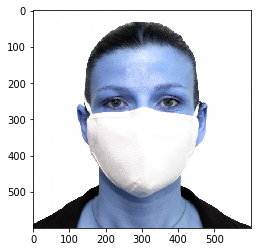

In [4]:
a=os.listdir(train_dir)
for i in a:
    b=os.path.join(train_dir,i)
    print(b)
    c=os.listdir(os.path.join(train_dir,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break
    

In [30]:
LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 64
num_classes = 2
epochs = 35
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples 

Found 995 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 64)       

In [33]:
filepath=str(os.getcwd()+"\mask.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

In [34]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             )

Epoch 1/35
15/15 [==============================] - ETA: 1:18 - loss: 0.6884 - acc: 0.531 - ETA: 59s - loss: 0.7027 - acc: 0.507 - ETA: 40s - loss: 1.8980 - acc: 0.50 - ETA: 38s - loss: 1.6280 - acc: 0.52 - ETA: 30s - loss: 1.4547 - acc: 0.51 - ETA: 24s - loss: 1.3343 - acc: 0.51 - ETA: 23s - loss: 1.2434 - acc: 0.50 - ETA: 22s - loss: 1.1758 - acc: 0.51 - ETA: 19s - loss: 1.1196 - acc: 0.52 - ETA: 15s - loss: 1.0748 - acc: 0.53 - ETA: 11s - loss: 1.0373 - acc: 0.53 - ETA: 8s - loss: 1.0042 - acc: 0.5430 - ETA: 5s - loss: 0.9713 - acc: 0.556 - ETA: 2s - loss: 0.9690 - acc: 0.552 - 43s 3s/step - loss: 0.9441 - acc: 0.5671 - val_loss: 0.7099 - val_acc: 0.5382

Epoch 00001: val_acc improved from -inf to 0.53819, saving model to C:\Users\shkatta\mask.h5f
Epoch 2/35
15/15 [==============================] - ETA: 12s - loss: 0.5222 - acc: 0.68 - ETA: 15s - loss: 0.6151 - acc: 0.60 - ETA: 13s - loss: 0.5947 - acc: 0.63 - ETA: 12s - loss: 0.5937 - acc: 0.66 - ETA: 11s - loss: 0.6164 - acc: 0.63

15/15 [==============================] - ETA: 12s - loss: 0.4225 - acc: 0.78 - ETA: 11s - loss: 0.3970 - acc: 0.81 - ETA: 10s - loss: 0.3799 - acc: 0.83 - ETA: 8s - loss: 0.3728 - acc: 0.8282 - ETA: 8s - loss: 0.4006 - acc: 0.817 - ETA: 7s - loss: 0.3977 - acc: 0.819 - ETA: 6s - loss: 0.4024 - acc: 0.818 - ETA: 5s - loss: 0.3848 - acc: 0.830 - ETA: 4s - loss: 0.4041 - acc: 0.811 - ETA: 4s - loss: 0.3996 - acc: 0.813 - ETA: 3s - loss: 0.3910 - acc: 0.819 - ETA: 2s - loss: 0.3936 - acc: 0.818 - ETA: 2s - loss: 0.3897 - acc: 0.824 - ETA: 1s - loss: 0.3873 - acc: 0.827 - 18s 1s/step - loss: 0.3935 - acc: 0.8228 - val_loss: 0.3489 - val_acc: 0.8403

Epoch 00012: val_acc improved from 0.82118 to 0.84028, saving model to C:\Users\shkatta\mask.h5f
Epoch 13/35
15/15 [==============================] - ETA: 10s - loss: 0.3382 - acc: 0.79 - ETA: 10s - loss: 0.3354 - acc: 0.83 - ETA: 9s - loss: 0.3984 - acc: 0.8073 - ETA: 8s - loss: 0.3919 - acc: 0.816 - ETA: 7s - loss: 0.4064 - acc: 0.818 - ETA: 7

15/15 [==============================] - ETA: 11s - loss: 0.4358 - acc: 0.81 - ETA: 10s - loss: 0.3997 - acc: 0.84 - ETA: 10s - loss: 0.3607 - acc: 0.85 - ETA: 9s - loss: 0.3498 - acc: 0.8516 - ETA: 8s - loss: 0.3357 - acc: 0.856 - ETA: 7s - loss: 0.3170 - acc: 0.867 - ETA: 7s - loss: 0.3076 - acc: 0.870 - ETA: 7s - loss: 0.3066 - acc: 0.871 - ETA: 6s - loss: 0.3058 - acc: 0.869 - ETA: 5s - loss: 0.3127 - acc: 0.862 - ETA: 4s - loss: 0.3244 - acc: 0.856 - ETA: 3s - loss: 0.3320 - acc: 0.853 - ETA: 2s - loss: 0.3312 - acc: 0.854 - ETA: 1s - loss: 0.3307 - acc: 0.852 - 19s 1s/step - loss: 0.3324 - acc: 0.8528 - val_loss: 0.3737 - val_acc: 0.8420

Epoch 00023: val_acc did not improve from 0.86806
Epoch 24/35
15/15 [==============================] - ETA: 12s - loss: 0.4509 - acc: 0.79 - ETA: 10s - loss: 0.3991 - acc: 0.80 - ETA: 9s - loss: 0.4264 - acc: 0.7969 - ETA: 9s - loss: 0.3883 - acc: 0.820 - ETA: 8s - loss: 0.3668 - acc: 0.834 - ETA: 7s - loss: 0.3691 - acc: 0.830 - ETA: 6s - loss:

15/15 [==============================] - ETA: 12s - loss: 0.3976 - acc: 0.81 - ETA: 16s - loss: 0.3053 - acc: 0.87 - ETA: 14s - loss: 0.3361 - acc: 0.85 - ETA: 12s - loss: 0.3431 - acc: 0.85 - ETA: 12s - loss: 0.3314 - acc: 0.86 - ETA: 11s - loss: 0.3331 - acc: 0.85 - ETA: 10s - loss: 0.3228 - acc: 0.86 - ETA: 9s - loss: 0.3319 - acc: 0.8594 - ETA: 7s - loss: 0.3244 - acc: 0.866 - ETA: 6s - loss: 0.3208 - acc: 0.865 - ETA: 4s - loss: 0.3160 - acc: 0.866 - ETA: 3s - loss: 0.3119 - acc: 0.869 - ETA: 2s - loss: 0.3064 - acc: 0.873 - ETA: 1s - loss: 0.3055 - acc: 0.872 - 21s 1s/step - loss: 0.3036 - acc: 0.8722 - val_loss: 0.2019 - val_acc: 0.8848

Epoch 00034: val_acc did not improve from 0.88889
Epoch 35/35
15/15 [==============================] - ETA: 11s - loss: 0.3157 - acc: 0.82 - ETA: 10s - loss: 0.3322 - acc: 0.84 - ETA: 12s - loss: 0.3316 - acc: 0.85 - ETA: 11s - loss: 0.3448 - acc: 0.84 - ETA: 10s - loss: 0.3241 - acc: 0.85 - ETA: 9s - loss: 0.3630 - acc: 0.8411 - ETA: 9s - loss:

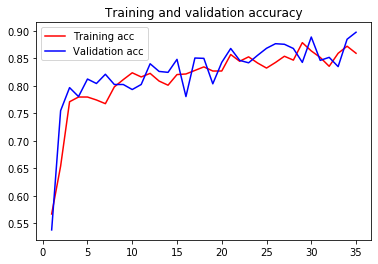

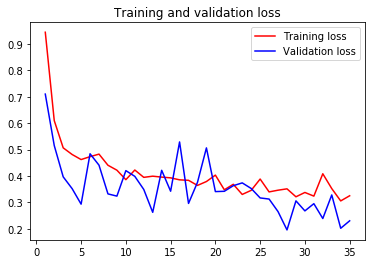

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [14]:
def plot_confusion_matrix(cm, target_names,title='Confusion matrix',cmap=None,normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)
        cm = np.round(cm,2)
        

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label\naccuracy={:0.4f}\n misclass={:0.4f}".format(accuracy, misclass))
    plt.show()


In [38]:
labels=['no_mask','mask']

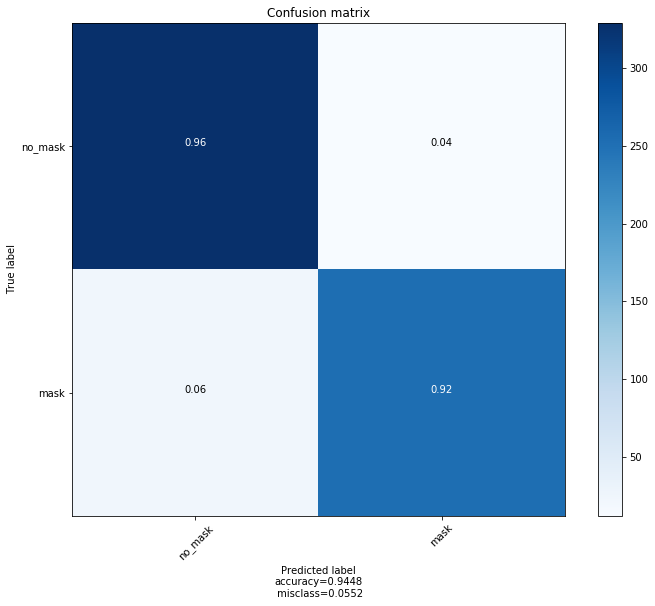

In [39]:
from keras.models import load_model
model_trained = load_model(filepath)
# Predict the values from the validation dataset
Y_pred = model_trained.predict_generator(validation_generator, validation_num // batch_size+1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, normalize=True, target_names=labels)

In [37]:
print(metrics.classification_report(validation_generator.classes, Y_pred_classes,target_names=labels))

              precision    recall  f1-score   support

     no_mask       0.95      0.94      0.95       341
        mask       0.93      0.93      0.93       275

    accuracy                           0.94       616
   macro avg       0.94      0.94      0.94       616
weighted avg       0.94      0.94      0.94       616



In [62]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(img,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=normalized.reshape((50,1104,-1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

ValueError: cannot reshape array of size 10000 into shape (50,1104,newaxis)